### Import Liberies

In [2]:
import torch
print(torch.__version__)
from torch import Tensor

import networkx as nx
from networkx.algorithms import community

import numpy as np
import matplotlib.pyplot as plt

import math
from tqdm import tqdm
import seaborn as sns
from sklearn.decomposition import FactorAnalysis

import random
from random import sample

import os
import collections

import pandas as pd
import scipy.sparse as sp

from scipy.sparse import csr_matrix
from scipy.sparse import csgraph
from scipy.sparse.linalg import inv

import torch_geometric
from torch_geometric.utils import to_networkx
from torch_geometric.datasets import Planetoid

from torch_geometric.datasets import WebKB
from torch_geometric.utils import to_dense_adj

import solvers_implt as solvers

2.2.1


## Create Data dir

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# maybe dont need
data_dir = "./data" 
os.makedirs(data_dir, exist_ok=True)


In [4]:
# dataset = os.path.join(os.getcwd(),'Cora')
# dataset

# Download Dataset

In [5]:
dataset = Planetoid(root='./cora',name='Cora') # Cora, Citeseer
print(dataset[0])
adj = to_dense_adj(dataset[0].edge_index)
adj = adj[0]
labels = dataset[0].y
labels = labels.numpy()

X = dataset[0].x
X = X.to_dense()
N = X.shape[0]
NO_OF_CLASSES =  len(set(np.array(dataset[0].y)))

print('Num of features(X) and Graph size(W)')
print(X.shape, adj.shape)
print('Num of Labels')
print(NO_OF_CLASSES)
#nn = int(1*N)
#X = X[:nn,:]
#adj = adj[:nn,:nn]
#labels = labels[:nn]
#print(X.shape,adj.shape)

def get_laplacian(adj):
    b=torch.ones(adj.shape[0])
    return torch.diag(adj@b)-adj

L = get_laplacian(adj)
print(L.shape)

U, S, Vh = np.linalg.svd(L, hermitian=True)

#eigenvalues, eigenvectors = np.linalg.eig(L)
#eigenvalues = np.real(eigenvalues)
#idx = np.argsort(S)[::-1]
#print(eigenvalues) 

r=0.25
k = round(r*N) # Coarsened graph's number of nodes i.e. k = r*ori_nodes
U_k=U[:,:k] # column on U 


Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])
Num of features(X) and Graph size(W)
torch.Size([2708, 1433]) torch.Size([2708, 2708])
Num of Labels
7
torch.Size([2708, 2708])


## General parmeters

In [8]:
overall_loss = []
overall_loss_my = []
iterations = 25 # Number of iterations our objective function will run.
#print("Shape of the data matrix (p x n): ", X_now.shape)

# Hyperparameters: lambda, beta, alpha, gamma
lambda_base = 500
beta_base = 0
alpha_base = 500
gamma_base = X.shape[1]/2

features = X.numpy()
L_arr=L.numpy()
obj = solvers.solver_v2(L_arr, features, k, lambda_base, beta_base, alpha_base, gamma_base) 
C_0, X_t_0, loss_ls = obj.fit(iterations)
overall_loss.extend(loss_ls)

lambda_my = 500
beta_my = 0
alpha_my = 500
gamma_my = X.shape[1]/2
my_ev_param=500

obj_my = solvers.my_method(L_arr, features, k, U_k, lambda_my, beta_my, alpha_my, gamma_my,my_ev_param)

C_0_my, X_t_0_my, loss_ls_my = obj_my.fit(iterations)
overall_loss_my.extend(loss_ls_my)


  0%|          | 0/25 [00:00<?, ?it/s]

 FGC  (XLX)
24.098573112650172


  4%|▍         | 1/25 [00:45<18:14, 45.59s/it]

 FGC  (gamma)
-1671662.292450527
 FGC  (alpha)
12079780.078690894
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
4624.995074035178


  8%|▊         | 2/25 [01:32<17:48, 46.44s/it]

 FGC  (gamma)
906607.0954510014
 FGC  (alpha)
10355099.8835897
 FGC  (lambda)
676999.9999999999
 FGC  (XLX)
5718.085369673583


 12%|█▏        | 3/25 [02:17<16:48, 45.85s/it]

 FGC  (gamma)
1021634.3269551112
 FGC  (alpha)
10092039.966606455
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6115.127598008734
 FGC  (gamma)
1055657.290743993
 FGC  (alpha)


 16%|█▌        | 4/25 [03:04<16:06, 46.03s/it]

9952575.641175682
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6275.349226542997


 20%|██        | 5/25 [03:49<15:18, 45.95s/it]

 FGC  (gamma)
1068075.7704666036
 FGC  (alpha)
9862329.391390245
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6354.2968215488345
 FGC  (gamma)
1074046.741211849


 24%|██▍       | 6/25 [04:37<14:44, 46.57s/it]

 FGC  (alpha)
9799735.33241217
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6397.087146576063


 28%|██▊       | 7/25 [05:19<13:30, 45.02s/it]

 FGC  (gamma)
1076813.5402167973
 FGC  (alpha)
9755431.87074465
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6422.849156591452
 FGC  (gamma)
1078421.0326447475
 FGC  (alpha)


 32%|███▏      | 8/25 [06:03<12:42, 44.86s/it]

9722257.497298816
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6433.241327966254


 36%|███▌      | 9/25 [06:48<11:55, 44.74s/it]

 FGC  (gamma)
1079188.5169495107
 FGC  (alpha)
9697711.909705877
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6440.727736408286
 FGC  (gamma)
1079943.8334676076


 40%|████      | 10/25 [07:34<11:16, 45.12s/it]

 FGC  (alpha)
9676805.298569346
 FGC  (lambda)
676999.9999999999
 FGC  (XLX)
6445.158910681048


 44%|████▍     | 11/25 [08:19<10:32, 45.15s/it]

 FGC  (gamma)
1080300.676170575
 FGC  (alpha)
9659791.92811223
 FGC  (lambda)
676999.9999999999
 FGC  (XLX)
6441.1557294957165


 48%|████▊     | 12/25 [09:05<09:48, 45.24s/it]

 FGC  (gamma)
1080134.4282889322
 FGC  (alpha)
9646178.943324642
 FGC  (lambda)
676999.9999999999
 FGC  (XLX)
6438.140462678606


 52%|█████▏    | 13/25 [09:49<08:59, 44.99s/it]

 FGC  (gamma)
1079924.2059795891
 FGC  (alpha)
9634469.177470824
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6435.517673704791


 56%|█████▌    | 14/25 [10:36<08:20, 45.53s/it]

 FGC  (gamma)
1079891.0299471472
 FGC  (alpha)
9624034.012408834
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6430.9237281871565
 FGC  (gamma)
1079859.7336311934


 60%|██████    | 15/25 [11:22<07:36, 45.63s/it]

 FGC  (alpha)
9615829.865698513
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6426.598596333739


 64%|██████▍   | 16/25 [12:07<06:51, 45.69s/it]

 FGC  (gamma)
1080052.9546886454
 FGC  (alpha)
9607801.433873987
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6420.274149096949


 68%|██████▊   | 17/25 [12:54<06:08, 46.07s/it]

 FGC  (gamma)
1080263.5226853902
 FGC  (alpha)
9600756.088048432
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6416.005919994126


 72%|███████▏  | 18/25 [13:39<05:18, 45.51s/it]

 FGC  (gamma)
1080470.1837869762
 FGC  (alpha)
9594173.394871514
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6417.751623643418
 FGC  (gamma)
1080934.1668254705


 76%|███████▌  | 19/25 [14:24<04:32, 45.36s/it]

 FGC  (alpha)
9587721.021750668
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6423.8655967107225
 FGC  (gamma)
1081546.7795208346


 80%|████████  | 20/25 [15:09<03:47, 45.46s/it]

 FGC  (alpha)
9581605.345011955
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6430.464999297312


 84%|████████▍ | 21/25 [15:54<03:00, 45.11s/it]

 FGC  (gamma)
1081972.498264845
 FGC  (alpha)
9576801.81457739
 FGC  (lambda)
676999.9999999999
 FGC  (XLX)
6438.465556889678
 FGC  (gamma)
1082326.769035676


 88%|████████▊ | 22/25 [16:42<02:18, 46.04s/it]

 FGC  (alpha)
9572693.986277906
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6446.052041435133


 92%|█████████▏| 23/25 [17:26<01:31, 45.50s/it]

 FGC  (gamma)
1082618.952049974
 FGC  (alpha)
9569260.688712796
 FGC  (lambda)
676999.9999999997
 FGC  (XLX)
6455.71073542104


 96%|█████████▌| 24/25 [18:11<00:45, 45.18s/it]

 FGC  (gamma)
1083220.303932838
 FGC  (alpha)
9566071.730052251
 FGC  (lambda)
677000.0000000001
 FGC  (XLX)
6462.6388717181235


100%|██████████| 25/25 [18:55<00:00, 45.42s/it]


 FGC  (gamma)
1083770.176383436
 FGC  (alpha)
9563193.458444027
 FGC  (lambda)
677000.0000000001


  0%|          | 0/25 [00:00<?, ?it/s]

 
 my  (ev) 

52.72517905743631


  4%|▍         | 1/25 [00:48<19:23, 48.50s/it]

 my  (alpha)
12068334.73358352
 my  (lambda)
677000.0000000001
 
 my  (ev) 

227.28046983484654
 my  (alpha)


  8%|▊         | 2/25 [01:37<18:45, 48.94s/it]

10401725.186366234
 my  (lambda)
677000.0000000001
 
 my  (ev) 

22825.574244613024
 my  (alpha)


 12%|█▏        | 3/25 [02:16<16:18, 44.50s/it]

10764056.072399834
 my  (lambda)
676999.9999999997
 
 my  (ev) 

25814.761425536475


 16%|█▌        | 4/25 [02:59<15:20, 43.82s/it]

 my  (alpha)
10682299.023236003
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26218.58644771731
 my  (alpha)


 20%|██        | 5/25 [03:43<14:35, 43.79s/it]

10635415.995863736
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26339.92078627213


 24%|██▍       | 6/25 [04:25<13:40, 43.17s/it]

 my  (alpha)
10608362.025202248
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26396.165022300967
 my  (alpha)


 28%|██▊       | 7/25 [05:06<12:44, 42.46s/it]

10592660.284650281
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26418.811669884446
 my  (alpha)


 32%|███▏      | 8/25 [05:48<12:02, 42.48s/it]

10582540.142801382
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26430.44098373479
 my  (alpha)


 36%|███▌      | 9/25 [06:29<11:11, 41.94s/it]

10576333.96918744
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26441.3354189972
 my  (alpha)


 40%|████      | 10/25 [07:12<10:33, 42.20s/it]

10571059.980377594
 my  (lambda)
676999.9999999997
 
 my  (ev) 

26449.67731350378
 my  (alpha)


 44%|████▍     | 11/25 [07:54<09:48, 42.05s/it]

10567522.439528069
 my  (lambda)
676999.9999999999
 
 my  (ev) 

26455.888869839142
 my  (alpha)


 48%|████▊     | 12/25 [08:36<09:08, 42.20s/it]

10564459.293487776
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26459.95414633453
 my  (alpha)


 52%|█████▏    | 13/25 [09:18<08:23, 41.99s/it]

10561235.93559647
 my  (lambda)
676999.9999999999
 
 my  (ev) 

26465.694746404453
 my  (alpha)


 56%|█████▌    | 14/25 [10:00<07:42, 42.08s/it]

10559011.124096174
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26476.072599066083
 my  (alpha)


 60%|██████    | 15/25 [10:41<06:58, 41.82s/it]

10557674.580760004
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26489.74926677194
 my  (alpha)


 64%|██████▍   | 16/25 [11:23<06:16, 41.85s/it]

10556775.304296672
 my  (lambda)
676999.9999999999
 
 my  (ev) 

26503.254981298625
 my  (alpha)


 68%|██████▊   | 17/25 [12:04<05:32, 41.57s/it]

10556270.533154776
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26516.46154344653
 my  (alpha)


 72%|███████▏  | 18/25 [12:46<04:51, 41.69s/it]

10555546.46450065
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26531.714413295886
 my  (alpha)


 76%|███████▌  | 19/25 [13:28<04:10, 41.68s/it]

10554790.312063918
 my  (lambda)
676999.9999999999
 
 my  (ev) 

26546.183489866387


 80%|████████  | 20/25 [14:10<03:29, 41.93s/it]

 my  (alpha)
10554393.85987003
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26553.544771594872
 my  (alpha)


 84%|████████▍ | 21/25 [14:51<02:46, 41.50s/it]

10553971.224170778
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26554.91494164268
 my  (alpha)


 88%|████████▊ | 22/25 [15:33<02:05, 41.82s/it]

10553460.557692885
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26557.97741278333
 my  (alpha)


 92%|█████████▏| 23/25 [16:12<01:21, 40.86s/it]

10552770.13547588
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26563.736982443632
 my  (alpha)


 96%|█████████▌| 24/25 [16:53<00:40, 40.85s/it]

10552182.940552825
 my  (lambda)
677000.0000000001
 
 my  (ev) 

26566.71178752766
 my  (alpha)


100%|██████████| 25/25 [17:32<00:00, 42.11s/it]

10551900.844444029
 my  (lambda)
677000.0000000001


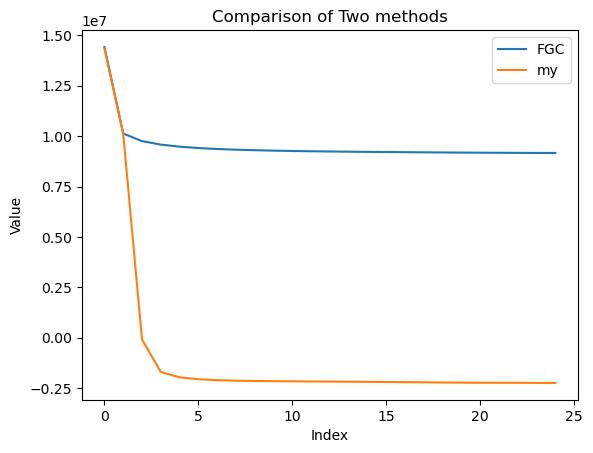

In [9]:
import matplotlib.pyplot as plt

plt.plot(overall_loss, label='FGC')

# Create a plot for the second list
plt.plot(overall_loss_my, label='my')

# Add title, labels, and legend
plt.title('Comparison of Two methods')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()

## dont need, use implementation file

 FGC eigen_error  (REE)
0.2066787969491575
 my eigen_error  (REE)
0.7208566497644574


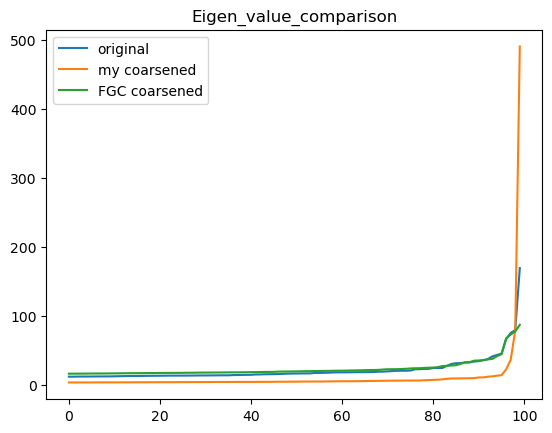

In [12]:

# compare C_0 (FGC), C_0_my
eigen_values,eigenvectors=np.linalg.eigh(L_arr)

eigen_values_all=np.sort(eigen_values)

#C_0_arr=C_0.numpy()
#C_0_my_arr=C_0_my.numpy()
FGC_eigen_values,FGC_eigenvector=np.linalg.eigh(C_0.T@L_arr@C_0)
my_eigen_values,FGC_eigenvector=np.linalg.eigh(C_0_my.T@L_arr@C_0_my)

FGC_eigen_values_all=np.sort(FGC_eigen_values)
my_eigen_values_all=np.sort(my_eigen_values)


eigen_values_k=eigen_values_all[-100:] # take the biggest k eigenvalues
FGC_eigen_values_k=FGC_eigen_values_all[-100:]
my_eigen_values_k=my_eigen_values_all[-100:]

#eigen_values_k=eigen_values_all[1:100] # take the biggest k eigenvalues
#FGC_eigen_values_k=FGC_eigen_values_all[1:100]
#my_eigen_values_k=my_eigen_values_all[1:100]

temp_FGC=0
temp_my=0

for j in range(len(eigen_values_k)):
  temp_FGC=temp_FGC+(abs(FGC_eigen_values_k[j]-eigen_values_k[j])/eigen_values_k[j])
  temp_my=temp_my+(abs(my_eigen_values_k[j]-eigen_values_k[j])/eigen_values_k[j])
eigenerror_FGC=temp_FGC/len(eigen_values_k)
eigenerror_my=temp_my/len(eigen_values_k)

print(" FGC eigen_error  (REE)")
print(eigenerror_FGC)
print(" my eigen_error  (REE)")
print(eigenerror_my)


plt.plot(eigen_values_k, label="original")
plt.plot(my_eigen_values_k, label="my coarsened")
plt.plot(FGC_eigen_values_k, label="FGC coarsened")
plt.title('Eigen_value_comparison')
plt.legend()
plt.show()


In [11]:
def HE(u,v):
    X_arr=X.numpy()
    return np.arccosh(1+((pow(np.linalg.norm((u-v)@X_arr),2)*pow(np.linalg.norm(X_arr),2))/(2*np.trace(X_arr.T@u@X_arr)*np.trace(X_arr.T@v@X_arr))))

P_0=np.linalg.pinv(C_0)
P_0_my=np.linalg.pinv(C_0_my)


L_FGC=P_0.T@C_0.T@L_arr@C_0@P_0
L_my=P_0_my.T@C_0_my.T@L_arr@C_0_my@P_0_my
FGC_HE_error=HE(L_FGC,L_arr)
my_HE_error=HE(L_my,L_arr)


print(" FGC Hyperbolic Error  (HE)")
print(FGC_HE_error)
print(" my Hyperbolic Error  (HE)")
print(my_HE_error)

LL_FGC=(L_arr-L_FGC)
LL_my=(L_arr-L_my)

FGC_RE_error=np.log(pow(np.linalg.norm(LL_FGC),2)/k)
my_RE_error=np.log(pow(np.linalg.norm(LL_my),2)/k)

print(" Reconstruction Error  (RE)")
print(FGC_RE_error)
print(" Reconstruction Error  (RE)")
print(my_RE_error)

 FGC Hyperbolic Error  (HE)
2.1543473225363736
 my Hyperbolic Error  (HE)
2.110691716146093
 Reconstruction Error  (RE)
5.045890274611453
 Reconstruction Error  (RE)
4.588086839827845


### Define GCN

In [13]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv


class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(X.shape[1], 64)
        self.conv2 = GCNConv(64, NO_OF_CLASSES)

    def reset_parameters(self):
        self.conv1.reset_parameters()
        self.conv2.reset_parameters()

    def forward(self, x, edge_index):

        #print("Checking 1: x", x.shape, "Edge index:", edge_index.shape)
        x = self.conv1(x, edge_index)
        #print("Checking 2: convolution done, new x:", x.shape)
        x = F.relu(x)
        #print("Checking 3: x", x.shape, "training:", self.training)
        x = F.dropout(x, training=self.training)
        #print("Checking 4: dropout done new x", x.shape, "Edge index:", edge_index.shape)
        x = self.conv2(x, edge_index)
        #print("Checking 5: x", x.shape)

        return F.log_softmax(x, dim=1)


In [14]:
def get_accuracy(C_0,L,X_t_0):
    global labels, NO_OF_CLASSES,k,N
    t=[]
    for i in [1,2,3,4,5,6,7,8,9,10]: 
        C_0_new=np.zeros(C_0.shape)
        for i in range(C_0.shape[0]):
            C_0_new[i][np.argmax(C_0[i])]=1
        # print(C_0_new)
        # C_0_new=C_0
        from scipy import sparse
        #Lc=C_0.T@L@C_0
        Lc=C_0_new.T@L@C_0_new
        # print("L:", Lc.shape)
        # Lc=L_new
        #print(Lc)
        Wc=(-1*Lc)*(1-np.eye(Lc.shape[0]))
        # print("W:", Wc.shape)
        Wc[Wc<0.1]=0
        Wc=sparse.csr_matrix(Wc)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen2 = torch.stack([row, col], dim=0)
        #print("edgecoarsen:", edge_index_coarsen2.shape)
        edge_weight = torch.from_numpy(Wc.data)
        #print("edgeweight:", edge_weight.shape)
        def one_hot(x, class_count):
            return torch.eye(class_count)[x, :]

        device = torch.device('cpu')
        labels=labels
        Y = labels
        #print("Y:", Y.shape)
        Y = one_hot(Y,NO_OF_CLASSES)
        # NO_OF_CLASSES=Y.shape[1]
        P=np.linalg.pinv(C_0_new)
        labels_coarse = torch.argmax(torch.sparse.mm(torch.Tensor(P).double() , Y.double()).double() , 1)
        labels_c=labels_coarse
        #print("Lables:", labels_coarse.shape)

        #torch.Tensor(C2)@X
        Wc=Wc.toarray()
        #Wc[Wc<0.01]=0
        C2=np.linalg.pinv(C_0_new)
        model=Net().to(device)
        device = torch.device('cpu')
        lr=0.01
        decay=0.0001
        # try:
        #   X=np.array(features.todense())
        # except:
        #   X = np.array(features)
        #print("X:",X.shape)
        
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=decay)
        # criterion=torch.nn.CrossEntropyLoss()
        x=sample(range(0, int(k)), k)
      
        from datetime import datetime
        #Xt=P@X
        Xt=X_t_0.numpy()
        def train():
            model.train()
            optimizer.zero_grad()
            out = model(torch.Tensor(Xt).to(device),edge_index_coarsen2)
            loss = F.nll_loss(out[x], labels_coarse[x])
            loss.backward()
            optimizer.step()
            return loss
        now1 = datetime.now()
        losses=[]
        for epoch in range(60):
            loss=train()
            losses.append(loss)
            if(epoch%10==0):
                print(f'Epoch: {epoch:03d},loss: {loss:.4f}')
        now2 = datetime.now()        
        pred=model(torch.Tensor(Xt).to(device),edge_index_coarsen2).argmax(dim=1)        
        def train_accuracy():
            model.eval()
            correct = (pred[x] == labels_coarse[x]).sum()
            acc = int(correct) /len(x)
            return acc
    
        t+=[(now2-now1).total_seconds()]

        zz=sample(range(0, int(N)), N)
        Wc=sparse.csr_matrix(adj)
        Wc = Wc.tocoo()
        row = torch.from_numpy(Wc.row).to(torch.long)
        col = torch.from_numpy(Wc.col).to(torch.long)
        edge_index_coarsen = torch.stack([row, col], dim=0)
        edge_weight = torch.from_numpy(Wc.data)
        pred=model(torch.Tensor(X),edge_index_coarsen).argmax(dim=1)
        pred=np.array(pred)
        correct =(pred[zz]==labels[zz]).sum()
        acc = int(correct) /N
        return acc



In [31]:
lambda_param = 500
beta_param =  0 
alpha_param = 500
gamma_param = X.shape[1]/2

C_0_t = torch.from_numpy(C_0)
X_t_0_t = torch.from_numpy(X_t_0)
av = []
acc = get_accuracy(C_0_t,L_arr,X_t_0_t)
av.append(acc)
print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100)) 

Epoch: 000,loss: 1.9469
Epoch: 010,loss: 1.6460
Epoch: 020,loss: 1.4044
Epoch: 030,loss: 1.1654
Epoch: 040,loss: 1.0028
Epoch: 050,loss: 0.9091
Accuracy = 0.8297636632200887 500 0 500 716.5
Average accuracy = 82.97636632200887 +/- 0.0


In [25]:
lambda_param = 500
beta_param =  0 
alpha_param = 500
gamma_param = X.shape[1]/2

C_0_t = torch.from_numpy(C_0_my)
X_t_0_t = torch.from_numpy(X_t_0_my)
av = []
acc = get_accuracy(C_0_t,L_arr,X_t_0_t)
av.append(acc)
print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100)) 

Epoch: 000,loss: 1.9482
Epoch: 010,loss: 1.2615
Epoch: 020,loss: 0.7816
Epoch: 030,loss: 0.5068
Epoch: 040,loss: 0.3414
Epoch: 050,loss: 0.2747
Accuracy = 0.8076070901033974 500 0 500 716.5
Average accuracy = 80.76070901033974 +/- 0.0


# My exp parameters

In [ ]:
overall_loss_my = []
iterations = 10 

for i in [0.05, 5, 50, 500,5000,5000]:

    print('%%%%%%%%%%%\n')
    print ('my_ev_param = ', i)
    print('%%%%%%%%%%%\n')
    lambda_my = 500
    beta_my = 0
    alpha_my = 500
    gamma_my = X.shape[1]/2
    my_ev_param=i

    obj_my = solvers.my_method(L_arr, features, k, U_k, lambda_my, beta_my, alpha_my, gamma_my,my_ev_param)

    C_0_my, X_t_0_my, loss_ls_my = obj_my.fit(iterations)
    overall_loss_my.extend(loss_ls_my)

    C_0_t = torch.from_numpy(C_0_my)
    X_t_0_t = torch.from_numpy(X_t_0_my)
    av = []
    for ii in range(10):
        acc = get_accuracy(C_0_t,L_arr,X_t_0_t)
        av.append(acc)
    print("Accuracy = " + str(acc) + " " + str(lambda_param)+" " + str(beta_param)+" "+str(alpha_param)+" "+str(gamma_param))
    print("Average accuracy = " + str(np.mean(av)*100)  + " +/- " + str(np.std(av)*100)) 